In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, normaltest

##  EDA

In [32]:
df = pd.read_csv('C:/Users/USER/Downloads/house_price.csv')

In [33]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [34]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [36]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [37]:
# Checking null values
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [38]:
#Checking the duplicates

num_duplicates = df.duplicated().sum()
print('The total number of duplicates:',num_duplicates)

The total number of duplicates: 1049


In [39]:
# Removing the duplicates in data
df = df.drop_duplicates()

In [40]:
#dropping columns
df = df.drop(columns= ['bhk','bath'])

In [41]:
len(df)
print('Number of rows after removal:',len(df))

Number of rows after removal: 12151


In [42]:
# shape of data 
df.shape

(12151, 5)

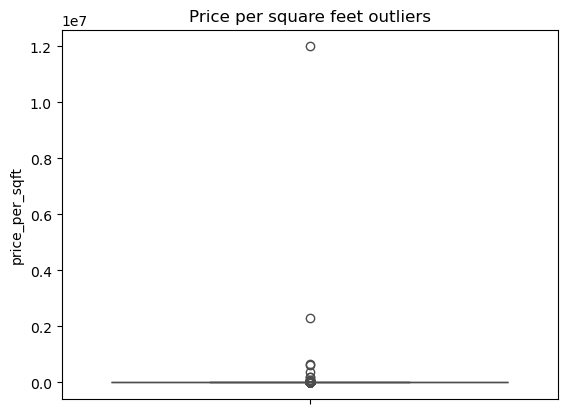

In [43]:
#Checking the Ouliers
#Using box plot
sns.boxplot(df['price_per_sqft'],color='red')
plt.title('Price per square feet outliers')
plt.show()

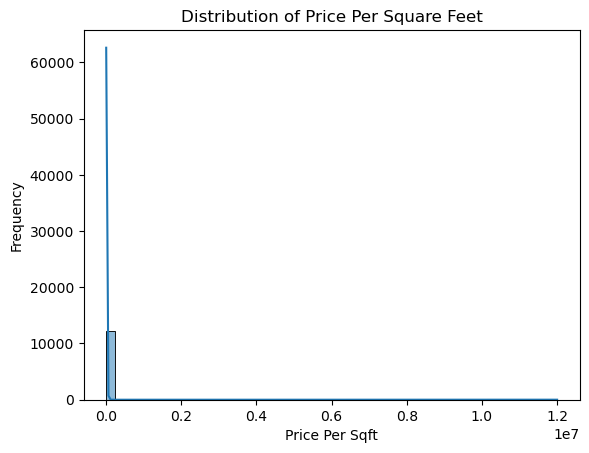

In [44]:
# Visualizing the distribution with histograms
sns.histplot(x=df['price_per_sqft'], bins=50, kde=True)
plt.title("Distribution of Price Per Square Feet")
plt.xlabel("Price Per Sqft")
plt.ylabel("Frequency")
plt.show()

# Detecting and Hanlding Outliers 


# IQR Method

In [47]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('The upper bound is:',upper_bound)
print('The lower bound is:',lower_bound)

The upper bound is: 12184.5
The lower bound is: -411.5


In [48]:
outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
print('Outliers detected:',outliers.shape[0])

Outliers detected: 1142


In [49]:
# Removing the outliers using trimming method

df_trimmed = df[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]


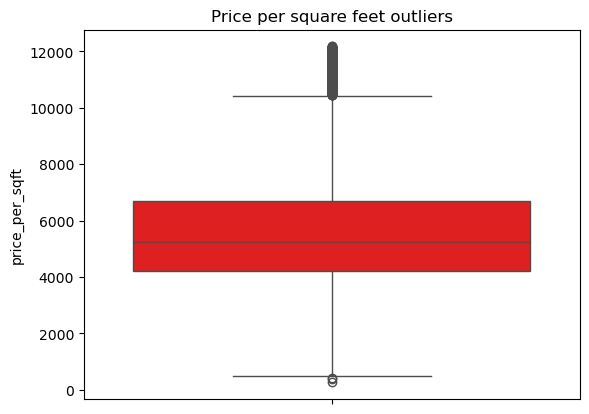

In [50]:
# Box plot after removing outliers using trimming method
sns.boxplot(df_trimmed['price_per_sqft'],color='red')
plt.title('Price per square feet outliers')
plt.show()

# Z Score Method

In [52]:
df_new = df.copy()

In [53]:
zs_pps = zscore(df_new['price_per_sqft'])

In [54]:
# Removing outliers using median imputation
df_new['price_per_sqft'] = np.where(np.abs(zs_pps)>3,df_new['price_per_sqft'].median(),df_new['price_per_sqft'])

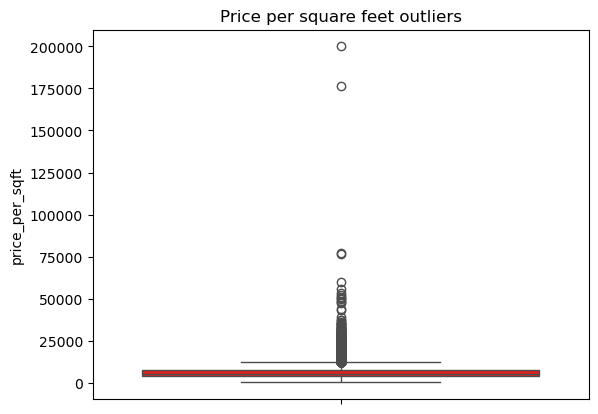

In [55]:
sns.boxplot(df_new['price_per_sqft'],color='red')
plt.title('Price per square feet outliers')
plt.show()

# Percentile Method

In [57]:
df_2 = df.copy()

In [58]:
upper_bound = df_2['price_per_sqft'].quantile(0.05)
lower_bound = df_2['price_per_sqft'].quantile(0.95)
print(upper_bound)
print(lower_bound)

3150.0
15600.0


In [59]:
#Removing Outliers using capping
df_2['price_per_sqft'] = np.where(df_2['price_per_sqft']>upper_bound,upper_bound,
                        np.where(df_2['price_per_sqft']<lower_bound,lower_bound,df_2['price_per_sqft']))

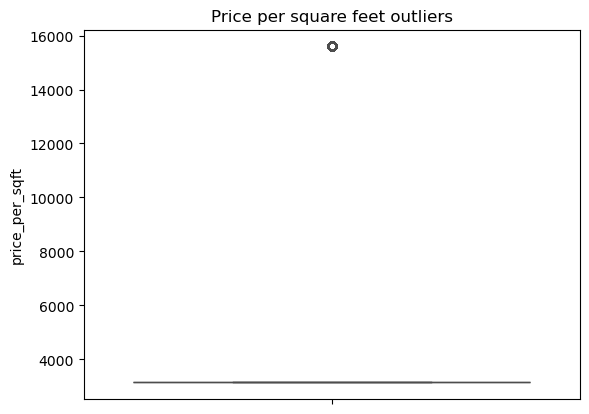

In [60]:
sns.boxplot(df_2['price_per_sqft'],color='red')
plt.title('Price per square feet outliers')
plt.show()

# Mean and Standard deviation

In [62]:
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()


In [63]:
lower_bound = mean - (3*std)
upper_bound = mean + (3*std)

In [64]:
# Detect outliers
outliers = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]
print("Outliers detected:", outliers.shape[0])

Outliers detected: 5


In [65]:
#  Removing outliers using trimming
df_trimmed_1 = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

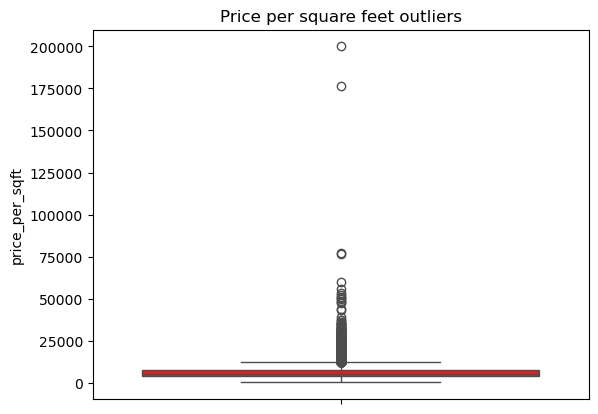

In [66]:
sns.boxplot(df_trimmed_1['price_per_sqft'],color='red')
plt.title('Price per square feet outliers')
plt.show()

In [67]:
# Treating for skewness
print('Skewness before Transformation')
print(df_trimmed['price_per_sqft'].skew())

Skewness before Transformation
0.977839864547141


In [68]:
# Here skewness is between -1 and 1, so no transformation is needed

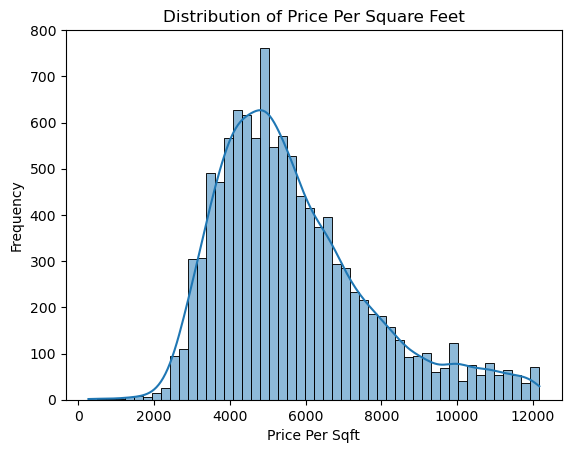

In [69]:
# Visualization after checking skewness

sns.histplot(x=df_trimmed['price_per_sqft'], bins=50, kde=True)
plt.title("Distribution of Price Per Square Feet")
plt.xlabel("Price Per Sqft")
plt.ylabel("Frequency")
plt.show()

In [121]:
# Compute correlation matrix (only numerical columns)
cols=['total_sqft','price','price_per_sqft']
corr_matrix = df[cols].corr()

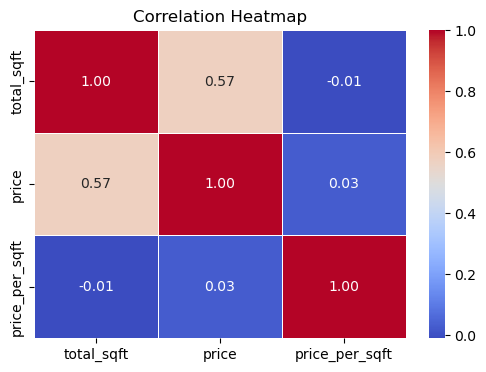

In [127]:
# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sns.scatterplot(data=df, x='price_per_sqft', y='price')
plt.xlabel("Price per Square feet")
plt.ylabel("Price")
plt.title("Scatter Plot between Column 1 and Column 2")
plt.show()